In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [8]:
def GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho):
    Z1 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    Z2 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W1 = np.zeros([NoOfPaths, NoOfSteps+1])
    W2 = np.zeros([NoOfPaths, NoOfSteps+1])

    dt = T / float(NoOfSteps)
    time = np.zeros([NoOfSteps+1])
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z1[:,i] = (Z1[:,i] - np.mean(Z1[:,i])) / np.std(Z1[:,i])
            Z2[:,i] = (Z2[:,i] - np.mean(Z2[:,i])) / np.std(Z2[:,i])

        # Correlate noises
        Z2[:,i]= rho * Z1[:,i] + np.sqrt(1.0 - rho**2) * Z2[:,i]

        W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]
        W2[:,i+1] = W2[:,i] + np.power(dt, 0.5)*Z2[:,i]

        time[i+1] = time[i] +dt

    #Store the results
    paths = {"time":time,"W1":W1,"W2":W2}
    return paths

def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T = 1.0

    ############### Negative correlation ######################
    rho =-0.9
    Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(W1))
    plt.plot(timeGrid, np.transpose(W2))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")

    ############### Positive correlation ######################
    rho =0.9
    Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]

    plt.figure(2)
    plt.plot(timeGrid, np.transpose(W1))
    plt.plot(timeGrid, np.transpose(W2))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")

    ############### Zero correlation ######################
    rho =0.0
    Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]

    plt.figure(3)
    plt.plot(timeGrid, np.transpose(W1))
    plt.plot(timeGrid, np.transpose(W2))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")

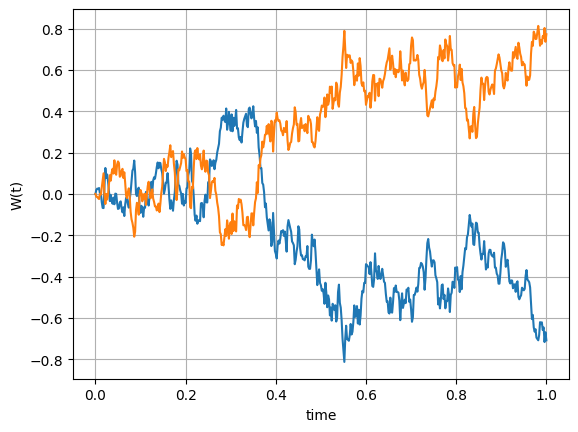

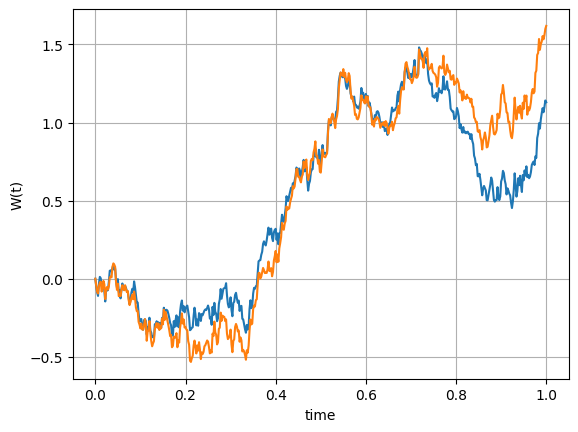

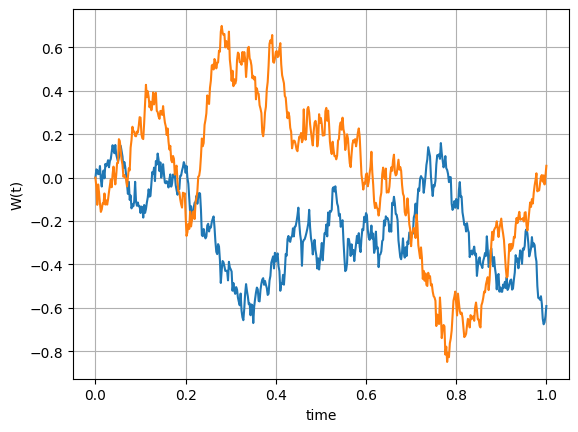

In [9]:
mainCalculation()